In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.anova import anova_lm
from scipy.stats import f
from scipy.stats import t
from PIL import Image

In [2]:
df_tempodist = pd.read_csv('data/tempodist.csv', delimiter=',')
df_tempodist

,tempo,distancia
0,15,8
1,20,6
2,20,15
3,40,20
4,50,25
5,25,11
6,10,5
7,55,32
8,35,28
9,30,20


In [3]:
# Estimação do modelo
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()
modelo.params

Intercept    5.878378
distancia    1.418919
dtype: float64

In [4]:
modelo.rsquared

0.8194256756756757

In [5]:
# Somatória dos quadrados do modelo (SQM)
modelo.ess

1638.8513513513512

In [6]:
# Somatória dos erros ao quadrado (SQErro)
modelo.ssr

361.14864864864865

In [7]:
n = modelo.nobs
n

10.0

In [8]:
df_residuos = modelo.df_resid
df_residuos

8.0

In [9]:
df_modelo = modelo.df_model
df_modelo

1.0

In [10]:
# Cálculo da estatística F de Fisher/Snedecor
F = ((modelo.ess)/df_modelo)/((modelo.ssr)/df_residuos)
F

36.30308699719364

In [11]:
# ANOVA (Analysis of Variance)
anova_lm(modelo)

,df,sum_sq,mean_sq,F,PR(>F)
distancia,1.0,1638.851351,1638.851351,36.303087,0.000314
Residual,8.0,361.148649,45.143581,NaN,NaN


In [12]:
anova_lm(modelo).F.iloc[0]

36.30308699719366

In [13]:
# Definição do p-value associado ao F calculado
1 - f.cdf(F, df_modelo, df_residuos)
# Portanto, HÁ MODELO! p<0.05

0.0003144488029083181

(array([6.000e+00, 6.400e+01, 2.400e+02, 5.010e+02, 8.880e+02, 1.421e+03,
        2.126e+03, 2.699e+03, 3.225e+03, 3.708e+03, 4.173e+03, 4.569e+03,
        4.886e+03, 4.980e+03, 4.954e+03, 4.956e+03, 4.719e+03, 4.822e+03,
        4.482e+03, 4.252e+03, 3.874e+03, 3.779e+03, 3.442e+03, 3.038e+03,
        2.774e+03, 2.531e+03, 2.331e+03, 1.971e+03, 1.866e+03, 1.546e+03,
        1.474e+03, 1.236e+03, 1.153e+03, 9.950e+02, 9.080e+02, 7.360e+02,
        6.700e+02, 5.470e+02, 5.160e+02, 4.520e+02, 3.760e+02, 3.030e+02,
        2.850e+02, 2.020e+02, 2.240e+02, 1.760e+02, 1.260e+02, 1.160e+02,
        1.210e+02, 8.600e+01, 7.100e+01, 5.700e+01, 6.300e+01, 4.400e+01,
        4.600e+01, 4.200e+01, 1.600e+01, 2.300e+01, 1.600e+01, 1.400e+01,
        1.000e+01, 1.300e+01, 1.200e+01, 9.000e+00, 5.000e+00, 3.000e+00,
        7.000e+00, 6.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+0

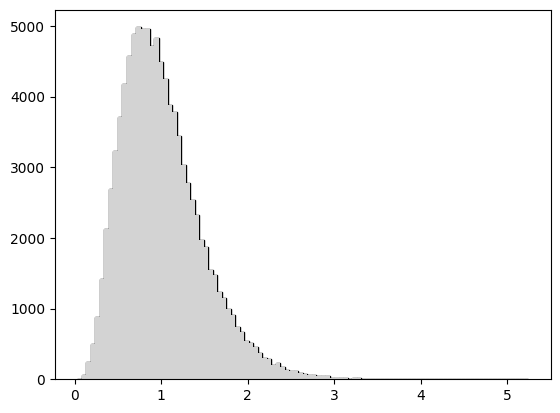

In [14]:
# F Hipotético
df1 = 10
df2 = 200

f_values = np.random.f(df1, df2, 100000)

plt.hist(f_values, bins=100, edgecolor='black')
plt.hist(f_values, bins=100, color='lightgrey')

In [15]:
# Voltando ao nosso modelo
# Cálculo do F crítico

f.ppf(0.95, df_modelo, df_residuos)

5.317655071578712

(array([2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 4.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        6.000e+00, 8.000e+00, 1.200e+01, 7.000e+00, 9.000e+00, 1.900e+01,
        3.100e+01, 4.100e+01, 2.700e+01, 6.300e+01, 6.500e+01, 7.800e+01,
        9.800e+01, 1.230e+02, 1.400e+02, 1.950e+02, 2.420e+02, 3.110e+02,
        3.510e+02, 4.220e+02, 5.010e+02, 6.240e+02, 7.430e+02, 8.810e+02,
        1.006e+03, 1.134e+03, 1.418e+03, 1.575e+03, 1.732e+03, 1.995e+03,
        2.197e+03, 2.312e+03, 2.479e+03, 2.783e+03, 2.970e+03, 3.055e+03,
        3.431e+03, 3.468e+03, 3.490e+03, 3.758e+03, 3.733e+03, 3.665e+03,
        3.856e+03, 3.767e+03, 3.665e+03, 3.474e+03, 3.395e+03, 3.255e+03,
        3.094e+03, 2.774e+03, 2.592e+03, 2.364e+03, 2.234e+03, 1.967e+03,
        1.785e+03, 1.601e+03, 1.403e+03, 1.207e+03, 1.064e+03, 8.760e+02,
        7.890e+02, 6.360e+02, 5.670e+02, 5.070e+02, 3.700e+02, 3.460e+02,
        2.320e+02, 2.240e+02, 1.450e+0

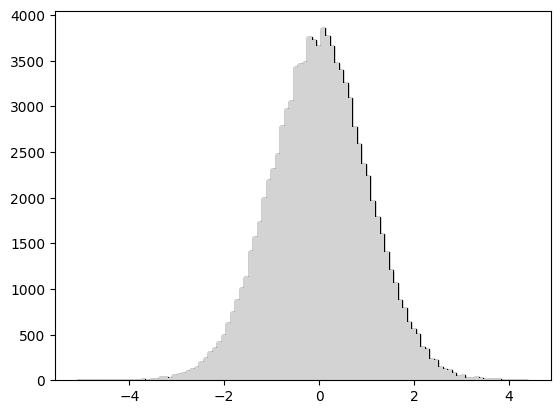

In [16]:
# Distribuição t de Student
# Hipotética

df = 40
t_values = np.random.standard_t(df, 100000)

plt.hist(t_values, bins=100, edgecolor='black')
plt.hist(t_values, bins=100, color='lightgrey')

In [17]:
# Cálculo da estatística t do beta da variável 'distancia' para o nosso exemplo
# t é a raiz quadrada de F (regressão simples)

t_estat = np.sqrt(F)
t_estat

6.025204311655633

In [18]:
# Cálculo do p-value da estatística t
t.sf(t_estat, df_residuos)*2

0.00031444880290832364

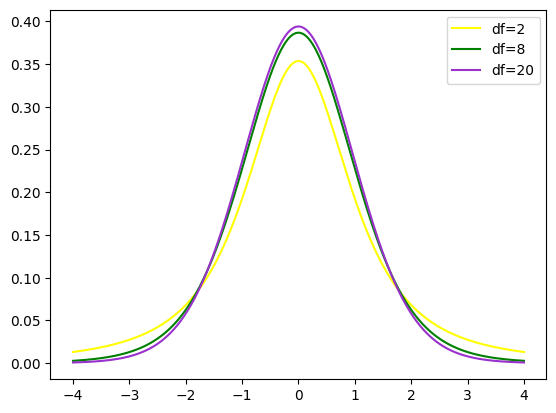

In [19]:
# Gráfico de distribuições t hipotéticas

x = np.arange(-4,4,0.0001)

plt.plot(x,t.pdf(x,2), label='df=2', color='yellow')
plt.plot(x,t.pdf(x,8), label='df=8', color='green')
plt.plot(x,t.pdf(x,20), label='df=20', color='darkorchid')
plt.legend()

In [20]:
# EXEMPLO 3:
df_corrupcao = pd.read_csv('data/corrupcao.csv',delimiter=',',encoding='utf-8')

df_corrupcao.groupby('regiao')['cpi'].mean().reset_index()

,regiao,cpi
0,America_do_sul,4.180000
1,Asia,2.329412
2,EUA_e_Canada,8.000000
3,Europa,6.258333
4,Oceania,9.000000


In [23]:
# Mudando a categoria de referência

df_corrupcao_dummies = pd.get_dummies(df_corrupcao, columns=['regiao'],
                                      dtype=int,
                                      drop_first=False) # n dummies

df_corrupcao_dummies.head()

,pais,cpi,regiao_America_do_sul,regiao_Asia,regiao_EUA_e_Canada,regiao_Europa,regiao_Oceania
0,Argentina,3.9,1,0,0,0,0
1,Australia,8.7,0,0,0,0,1
2,Austria,7.9,0,0,0,1,0
3,Belgium,7.1,0,0,0,1,0
4,Brazil,4.0,1,0,0,0,0


In [24]:
# Categoria de referência = Oceania

# Definição da fórmula utilizada no modelo
lista_colunas = list(df_corrupcao_dummies.drop(columns=['cpi','pais',
                                                        'regiao_Oceania']).columns)
formula_dummies_modelo = ' + '.join(lista_colunas)
formula_dummies_modelo = "cpi ~ " + formula_dummies_modelo
print("Fórmula utilizada: ",formula_dummies_modelo)

Fórmula utilizada:  cpi ~ regiao_America_do_sul + regiao_Asia + regiao_EUA_e_Canada + regiao_Europa


In [26]:
# Estimação
modelo_corrupcao_dummies = sm.OLS.from_formula(formula_dummies_modelo,
                                               df_corrupcao_dummies).fit()

# Parâmetros do 'modelo_corrupcao_dummies'
print(modelo_corrupcao_dummies.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     17.09
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           1.37e-08
Time:                        20:38:38   Log-Likelihood:                -96.620
No. Observations:                  50   AIC:                             203.2
Df Residuals:                      45   BIC:                             212.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.00